In [ ]:
#in this notebook I will try to answer the following questios about video games scoring 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [4]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


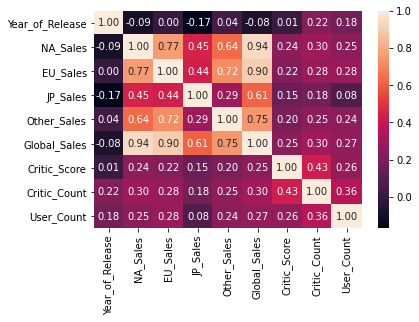

In [6]:
sns.heatmap(df.corr(),annot=True,fmt = '.2f')

In [7]:
df = df.dropna(subset=['User_Score'])

In [8]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [9]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,9840.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,8099.000000,8099.000000,7590.000000
mean,2007.630996,0.315353,0.180972,0.045444,0.064007,0.606025,68.975553,26.430794,162.229908
std,4.117508,0.817963,0.580799,0.240067,0.227519,1.656097,13.935015,18.990762,561.282326
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2005.000000,0.050000,0.010000,0.000000,0.010000,0.080000,60.000000,12.000000,10.000000
50%,2008.000000,0.120000,0.040000,0.000000,0.020000,0.210000,71.000000,22.000000,24.000000
75%,2010.000000,0.300000,0.150000,0.000000,0.050000,0.560000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [13]:
df.isnull().sum(axis = 0)

Name                  0
Platform              0
Year_of_Release     175
Genre                 0
Publisher             8
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       1916
Critic_Count       1916
User_Score            0
User_Count         2425
Developer            33
Rating              136
dtype: int64

In [16]:
df = df.dropna(subset=['Critic_Score'])

In [17]:
df.isnull().sum(axis = 0)

Name                  0
Platform              0
Year_of_Release     149
Genre                 0
Publisher             4
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count         1082
Developer             6
Rating               74
dtype: int64

In [26]:
df = df.drop(['Developer', 'Rating','User_Count','Year_of_Release'], axis=1)

In [23]:
df.isnull().sum(axis = 0)

Name                 0
Platform             0
Year_of_Release    149
Genre                0
Publisher            4
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score           0
dtype: int64

In [24]:
df['Publisher'].fillna('Unknown', inplace=True)

In [27]:
df.isnull().sum(axis = 0)

Name            0
Platform        0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Critic_Score    0
Critic_Count    0
User_Score      0
dtype: int64

In [36]:
cat_cols = {'Platform','Genre','Publisher'}
dummy_na = False

def create_dummy_df(df, cat_cols, dummy_na):
    for col in cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df
df = create_dummy_df(df, cat_cols, dummy_na)

In [37]:
df

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Publisher_1C Company,...,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,Wii Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,0,...,0,0,0,0,0,1,0,0,0,0
2,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,0,...,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,0,...,0,0,0,0,0,1,0,0,0,0
6,New Super Mario Bros.,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,0,...,0,0,0,0,0,0,0,0,0,0
7,Wii Play,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,0,...,0,0,0,0,0,0,0,0,0,0
16701,Bust-A-Move 3000,0.01,0.00,0.00,0.00,0.01,53.0,4.0,tbd,0,...,0,0,0,0,0,0,0,0,0,0
16702,Mega Brain Boost,0.01,0.00,0.00,0.00,0.01,48.0,10.0,tbd,0,...,0,0,0,0,0,0,0,0,0,0
16706,STORM: Frontline Nation,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df = df[df.User_Score != 'tbd']

In [41]:
df.dtypes

Name              object
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
                  ...   
Platform_Wii       uint8
Platform_WiiU      uint8
Platform_X360      uint8
Platform_XB        uint8
Platform_XOne      uint8
Length: 337, dtype: object

In [47]:
X = df.drop(['User_Score', 'Name'], axis=1)
y = df['User_Score']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .25, random_state = 42)